# Exploring National Wealth data


Source data is `IMF_GDP.xls`

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import numpy as np

In [2]:
filename = './IMF_GDP.xls'
if os.path.isfile(filename):
    print(f"Found {filename}. Loading data.")
    df=pd.read_excel('./IMF_GDP.xls')    
else:
    raise IOError('File not present in expected location')

Found ./IMF_GDP.xls. Loading data.


In [3]:
df.head()

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.9,1.3,0.8,2,3,3.5,4,4.5,5,5.5
2,Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,...,1,1.8,2.6,3.4,3.7,4.1,4.1,4.1,4.1,4.1
3,Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,...,2.8,3.8,3.8,4.2,1.4,0.6,1.2,1.7,2.2,2.3
4,Angola,2.4,-4.4,0,4.2,6,3.5,2.9,4.1,6.1,...,6.8,4.8,3,0,1.3,1.5,1.4,1.5,1.4,1.4


If we want to work with data by country, the best thing to do is make time the rows, and coutries the column. We can use the Transpose (T) function of pandas for that. Currently, if we transposed this will give us a little problem in that the countries will be the first row rather than column headings as we want. To get round this we should:
* first make the first row the Index.
* Drop the first row from the table.

In [4]:
df.index = df['Real GDP growth (Annual percent change)']
df = df.drop(['Real GDP growth (Annual percent change)'], axis=1)
df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Real GDP growth (Annual percent change),,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.9,1.3,0.8,2,3,3.5,4,4.5,5,5.5
Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,9.8,...,1,1.8,2.6,3.4,3.7,4.1,4.1,4.1,4.1,4.1
Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,4.8,...,2.8,3.8,3.8,4.2,1.4,0.6,1.2,1.7,2.2,2.3
Angola,2.4,-4.4,0,4.2,6,3.5,2.9,4.1,6.1,0,...,6.8,4.8,3,0,1.3,1.5,1.4,1.5,1.4,1.4


Now we can transpose the dataframe, and get the desired result.

In [5]:
df = df.T

In [6]:
df.head()

Real GDP growth (Annual percent change),nan,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and North Africa,"Middle East, North Africa, Afghanistan, and Pakistan",Other advanced economies,Sub-Saharan Africa,World,nan,"©IMF, 2017"
1980,NaN,no data,2.7,-5.4,2.4,7.5,0.7,no data,2.9,2.3,...,1.3,6.4,0.9,-2.5,-1.9,3.7,no data,2.1,NaN,NaN
1981,NaN,no data,5.7,3,-4.4,3.3,-5.7,no data,4.1,-0.1,...,0,0.8,2,-0.7,-0.3,2.9,no data,1.9,NaN,NaN
1982,NaN,no data,2.9,6.4,0,-1,-3.1,no data,0.1,1.9,...,0.8,-0.5,-0.1,0.1,0.6,2.1,no data,0.7,NaN,NaN
1983,NaN,no data,1.1,5.4,4.2,6.2,3.7,no data,-0.5,2.8,...,2.1,-2.8,3.3,0.4,0.9,4,no data,2.7,NaN,NaN
1984,NaN,no data,2,5.6,6,10.4,2,no data,6.3,0.3,...,2.5,3.9,5,0.1,0.4,6.6,no data,4.6,NaN,NaN


In [7]:
# list of new keys
for k in df.keys():

    print(k)

nan
Afghanistan
Albania
Algeria
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China, People's Republic of
Colombia
Comoros
Congo, Dem. Rep. of the
Congo, Republic of 
Costa Rica
Croatia
Cyprus
Czech Republic
Côte d'Ivoire
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
FYR Macedonia
Fiji
Finland
France
Gabon
Gambia, The
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong SAR
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Korea, Republic of
Kosovo
Kuwait
Kyrgyz Republic
Lao P.D.R.
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
Luxembourg
Macao SA

Dataframe still needs cleaning as 'no data' is incorrectly the missing value, strings should not be an entry in numeric data!

In [16]:
df['Euro area'][1980]

'no data'

In [19]:
mask = df == 'no data'
df[mask] = np.NaN

In [20]:
df['Euro area'][1980]

nan

## Nan bug
We have a horrible bug where nan became a key in the dataframe. We can get rid of it by checking for equality in the key names

In [42]:
values = []
columns = []
years = df.index.values

for row in df.index: 
    tmp = []
    for key in df:
        if key == key:
            tmp.append(df[key][row])
            if row == 1980:
                columns.append(key)
    values.append(tmp)

In [51]:
#for row in df.index:
#    print(row)

df = pd.DataFrame(values, columns=columns, index=years)

Now, after all that, we finally have a cleaned, value/nan only, country column dataframe ready to work from!

In [52]:
df.head()

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and North Africa,"Middle East, North Africa, Afghanistan, and Pakistan",Other advanced economies,Sub-Saharan Africa,World,"©IMF, 2017"
1980,NaN,2.7,-5.4,2.4,7.5,0.7,NaN,2.9,2.3,NaN,...,NaN,1.3,6.4,0.9,-2.5,-1.9,3.7,NaN,2.1,NaN
1981,NaN,5.7,3.0,-4.4,3.3,-5.7,NaN,4.1,-0.1,NaN,...,NaN,0.0,0.8,2.0,-0.7,-0.3,2.9,NaN,1.9,NaN
1982,NaN,2.9,6.4,0.0,-1.0,-3.1,NaN,0.1,1.9,NaN,...,NaN,0.8,-0.5,-0.1,0.1,0.6,2.1,NaN,0.7,NaN
1983,NaN,1.1,5.4,4.2,6.2,3.7,NaN,-0.5,2.8,NaN,...,NaN,2.1,-2.8,3.3,0.4,0.9,4.0,NaN,2.7,NaN
1984,NaN,2.0,5.6,6.0,10.4,2.0,NaN,6.3,0.3,NaN,...,NaN,2.5,3.9,5.0,0.1,0.4,6.6,NaN,4.6,NaN


## exploration

Now we have reached a phase where we can access time series data by country key.

/Users/Ben/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/transforms.py:661: RuntimeWarning: invalid value encountered in absolute
  inside = ((abs(dx0 + dx1) + abs(dy0 + dy1)) == 0)


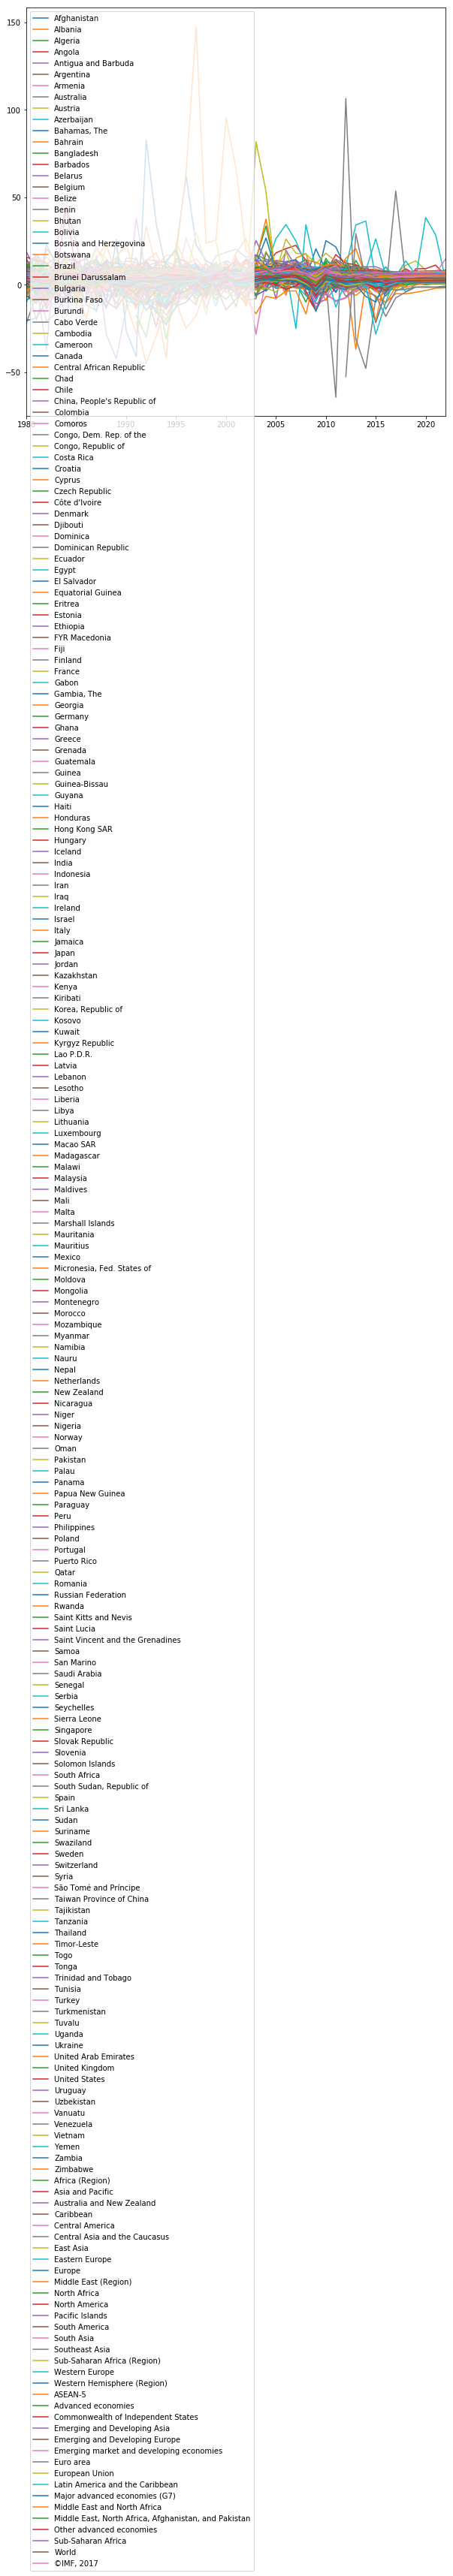

In [55]:
# we can now plot the whole dataframe. But it still looks crappy!
df.plot(figsize=(10,10))
plt.show()

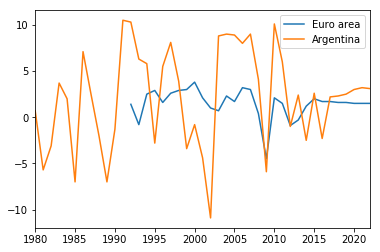

In [60]:
# we can acces specific countries using the name as a key
df['Euro area'].plot()
df['Argentina'].plot()
plt.legend()
plt.show()

But we should try and do something much more ambitious now the data is cleaned...

## Interactive plots!